## **Servo Prediction using Linear Regression**

This data set id from a simulation of a servo system involving a servo amplifier,a motor,a lead screw, and a sliding carriage of some sort.

## **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# **Import** **Dataset**

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df.shape

(167, 5)

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# **Get Encoding of Categorial Feactures**

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

# **Define Y(dependent or label or target variable) And X(independent or features or attribute variable)**

In [ ]:
Y = df['Class']

In [ ]:
Y.shape

(167,)

In [ ]:
Y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
X = df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# **Get Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((111, 4), (56, 4), (111,), (56,))

# **Get Model Train**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

## **Get Model Prediction**

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
Y_pred.shape

(56,)

In [ ]:
Y_pred

array([24.46530091, 31.31901745, 18.69390971, 25.8840983 , 38.74198193,
       23.68665329, 11.3980176 , 20.16268155, 40.6914783 , 41.50867489,
       13.34751397, 26.32627388, 16.74441334, 16.63870982, 22.42728113,
       22.80230214, -5.60680742, 30.31379003, 32.2632864 ,  1.93703334,
       34.40081361, 31.44608982, 33.7106894 , 30.18671766, 20.03560918,
        6.72037723, 28.71794582, 17.08088539, 25.19397409,  3.63858107,
       30.6674422 , 23.37155008, 35.34508257, 32.13621403, 12.73971707,
        3.32347787, 23.93460193, 33.26851382, 17.77100961, 37.60968214,
       27.54709707, 22.11217793, 11.60741728,  9.65792091, 30.62889323,
       28.36429366, 33.39558619,  4.45577765, 24.0616743 , 20.97987814,
       25.32104646, 11.92252049, 24.54239883, 37.16750657, 20.85280577,
        0.2416817 ])

# **Get Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(Y_test, Y_pred)

66.2494640413856

In [ ]:
mean_absolute_error(Y_test, Y_pred)

7.240383516948094

In [ ]:
r2_score(Y_test, Y_pred)

0.6830937970725519

# **Get Visualization of actual VS Predicted Resuls**

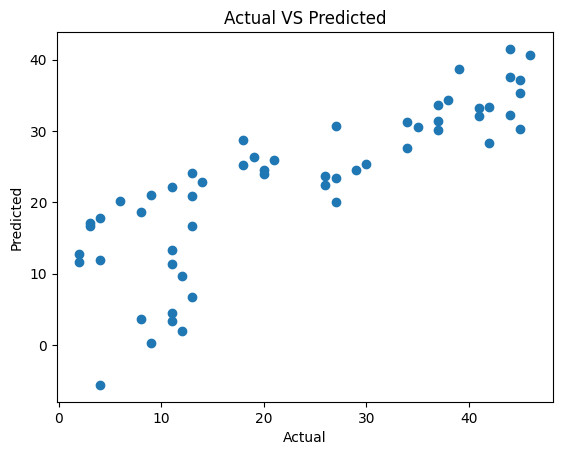

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()